# Pokémon Dataset Analysis

## Project Overview
This notebook explores the Pokémon dataset to answer five key analytical questions and builds predictive tools, including a team recommender system and a model to predict Pokémon attributes.

---

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load and Explore Dataset

- Load the CSV
- Inspect column names, types, and missing values
- Use `ydata_profiling` for a broad overview (optional but helpful)

---

In [3]:
file_path = '../Datasets/Pokemon.csv'
df = pd.read_csv(file_path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


## 3. Data Cleaning

- Drop or fill missing values
- Clean inconsistent types/values
- Encode categories if needed for modeling

---

In [5]:
# Before we do anything else, let's fiter out all the mega evolutions
df = df[~df['Name'].str.contains('Mega')]

In [6]:
# List of Pokémon names considered Mythical
mythical_pokemon_names = [
    "Mew", "Celebi", "Jirachi", "Deoxys", "Darkrai", "Shaymin", "Manaphy", "Phione",
    "Arceus", "Victini", "Keldeo", "Meloetta", "Genesect", "Diancie", "Hoopa",
    "Volcanion", "Magearna", "Marshadow", "Zeraora", "Meltan", "Melmetal",
    "Zarude", "Pecharunt"
]

# Add Mythical column to original df
df["Mythical"] = df["Name"].isin(mythical_pokemon_names)

In [7]:
# Create a copy with the Mythical column
df_mythical = df.copy()
mythical_df = df[df["Mythical"]]

In [8]:
# Create a new column 'Category' for grouping
df["Category"] = "Normal"
df.loc[df["Legendary"], "Category"] = "Legendary"
df.loc[df["Mythical"], "Category"] = "Mythical"

df.drop(["Legendary", "Mythical"], axis=1, inplace=True)

In [9]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        376
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Category        0
dtype: int64

In [10]:
df["Type 2"] = df["Type 2"].fillna("None")

In [11]:
df.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Category      object
dtype: object

## 4. Exploratory Data Analysis (EDA)

### Q1. Worst Pokémon in Each Generation (based on Total Stats)
- Group by generation
- Identify Pokémon with the lowest total

In [12]:
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Category'],
      dtype='object')

In [13]:
df[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Total"]].describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
count,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000,751.000000
mean,68.669774,75.978695,71.744341,70.213049,70.109188,66.607190,423.322237
std,25.946152,29.920554,29.629870,30.263860,27.401096,27.845601,112.932936
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,50.000000,55.000000,50.000000,45.000000,50.000000,45.000000,325.000000
50%,65.000000,75.000000,68.000000,65.000000,65.000000,65.000000,430.000000
75%,80.000000,95.000000,90.000000,90.000000,85.000000,88.500000,500.000000
max,255.000000,180.000000,230.000000,180.000000,230.000000,180.000000,770.000000


In [14]:
stat_cols = ["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]

In [15]:
# Get 25th percentile for each stat
thresholds = df[stat_cols].quantile(0.25)

In [16]:
# Find Pokémon that are below the 25th percentile for ALL stats
worst_stat_pokemon = df[
    (df[stat_cols] < thresholds).all(axis=1) &
    (df["Category"] == "Normal")
]
worst_stat_pokemon[["Name", "Generation", "Total"] + stat_cols]

,Name,Generation,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
175,Sentret,2,215,35,46,34,35,45,20
206,Sunkern,2,180,30,30,30,30,30,30
255,Tyrogue,2,210,35,35,35,35,35,35
288,Wurmple,3,195,45,45,35,20,30,20
446,Kricketot,4,194,37,25,41,25,41,25
457,Burmy,4,224,40,29,45,29,45,36
732,Scatterbug,6,200,38,35,40,27,25,35


C:\Users\Owner\AppData\Local\Temp\ipykernel_27556\1579971512.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


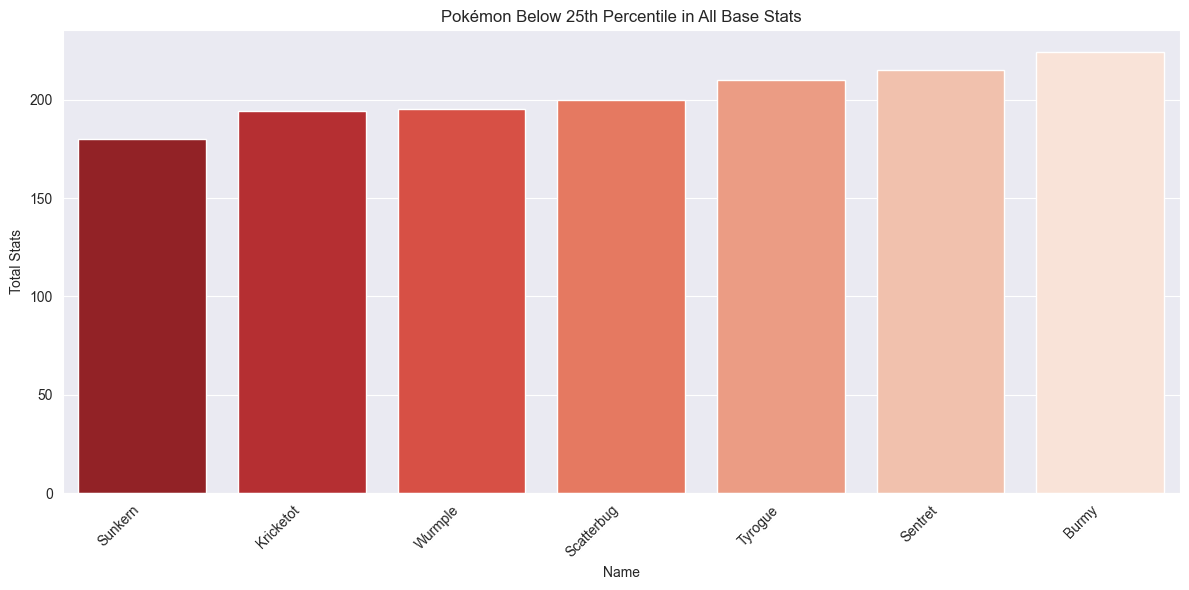

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=worst_stat_pokemon.sort_values("Total"),
    x="Name", y="Total", palette="Reds_r"
)
plt.xticks(rotation=45, ha='right')
plt.title("Pokémon Below 25th Percentile in All Base Stats")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()


### Identifying the Worst Pokémon by Stats

To define the "worst" Pokémon more objectively, we used a **quantile-based approach**. Specifically, we identified Pokémon that fall **below the 25th percentile** (1st quartile) in **every single base stat**, including:

- HP (Hit Points)
- Attack
- Defense
- Special Attack
- Special Defense
- Speed

This means we're not just looking at overall "Total" stat values — we're targeting Pokémon that are consistently underpowered across **all individual stats**, making them weak and unreliable in most battle scenarios.

This method avoids false positives (like Pokémon with one great stat but poor others) and highlights Pokémon that lack any meaningful competitive edge. It’s a fair and data-driven way to flag Pokémon that are statistically at a disadvantage.

### Q2. Best Pokémon in Each Generation
- Same logic, but highest total

In [18]:
lower = df[stat_cols].quantile(0.25)
upper = df[stat_cols].quantile(0.75)

In [19]:
# Find Pokémon whose stats fall within the IQR for all stats
good_stat_pokemon = df[
    ((df[stat_cols] >= lower) & (df[stat_cols] <= upper)).all(axis=1) &
    (df["Category"] == "Normal")
]
# Display
good_stat_pokemon[["Name", "Generation", "Total"] + stat_cols]

,Name,Generation,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
1,Ivysaur,1,405,60,62,63,80,80,60
5,Charmeleon,1,405,58,64,58,80,65,80
10,Wartortle,1,405,59,63,80,65,80,58
21,Pidgeotto,1,349,63,60,55,50,50,71
29,Arbok,1,438,60,85,69,65,79,80
35,Nidorina,1,365,70,62,67,55,55,56
38,Nidorino,1,365,61,72,57,55,55,65
90,Farfetch'd,1,352,52,65,55,58,62,60
128,Seaking,1,450,80,92,65,65,80,68
144,Eevee,1,325,55,55,50,45,65,55


C:\Users\Owner\AppData\Local\Temp\ipykernel_27556\2064996548.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


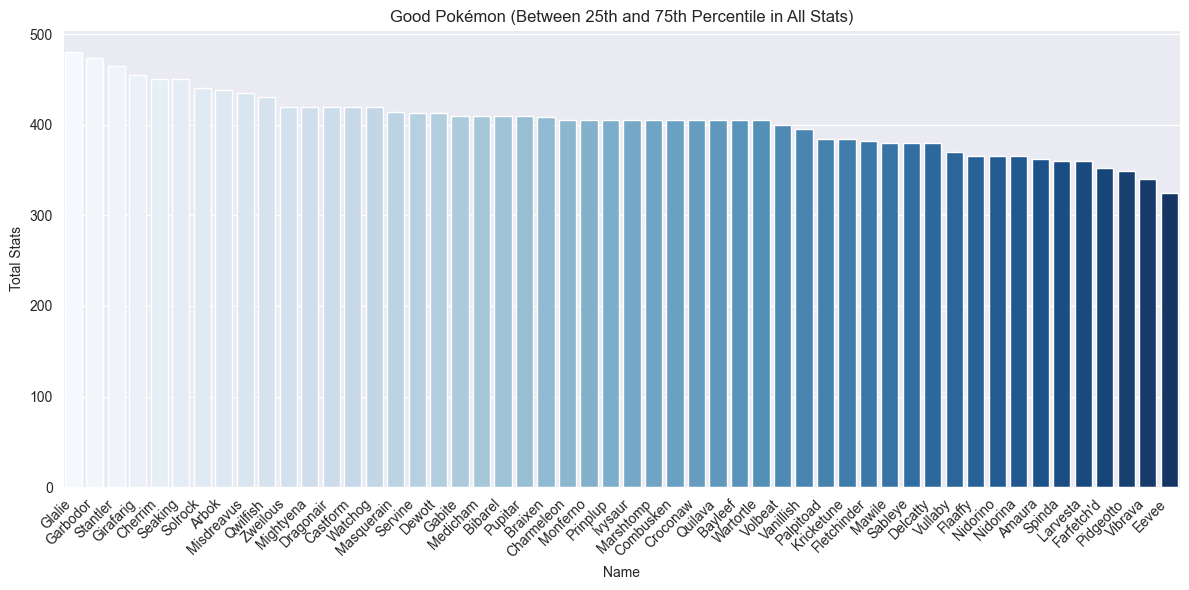

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=good_stat_pokemon.sort_values("Total", ascending=False),
    x="Name", y="Total", palette="Blues"
)
plt.xticks(rotation=45, ha='right')
plt.title("Good Pokémon (Between 25th and 75th Percentile in All Stats)")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()

In [21]:
upper2 = df[stat_cols].quantile(0.50)

elite_pokemon = df[
    (df[stat_cols] > upper2).all(axis=1) & (df["Category"] == "Normal")
    ]
# Show the results
elite_pokemon[["Name", "Generation", "Total"] + stat_cols]

,Name,Generation,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
2,Venusaur,1,525,80,82,83,100,100,80
6,Charizard,1,534,78,84,78,109,85,100
11,Blastoise,1,530,79,83,100,85,105,78
22,Pidgeot,1,479,83,80,75,70,70,101
36,Nidoqueen,1,505,90,92,87,75,85,76
39,Nidoking,1,505,81,102,77,85,75,85
43,Ninetales,1,505,73,76,75,81,100,100
60,Golduck,1,500,80,82,78,95,80,85
64,Arcanine,1,555,90,110,80,100,80,95
67,Poliwrath,1,510,90,95,95,70,90,70


C:\Users\Owner\AppData\Local\Temp\ipykernel_27556\852032670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


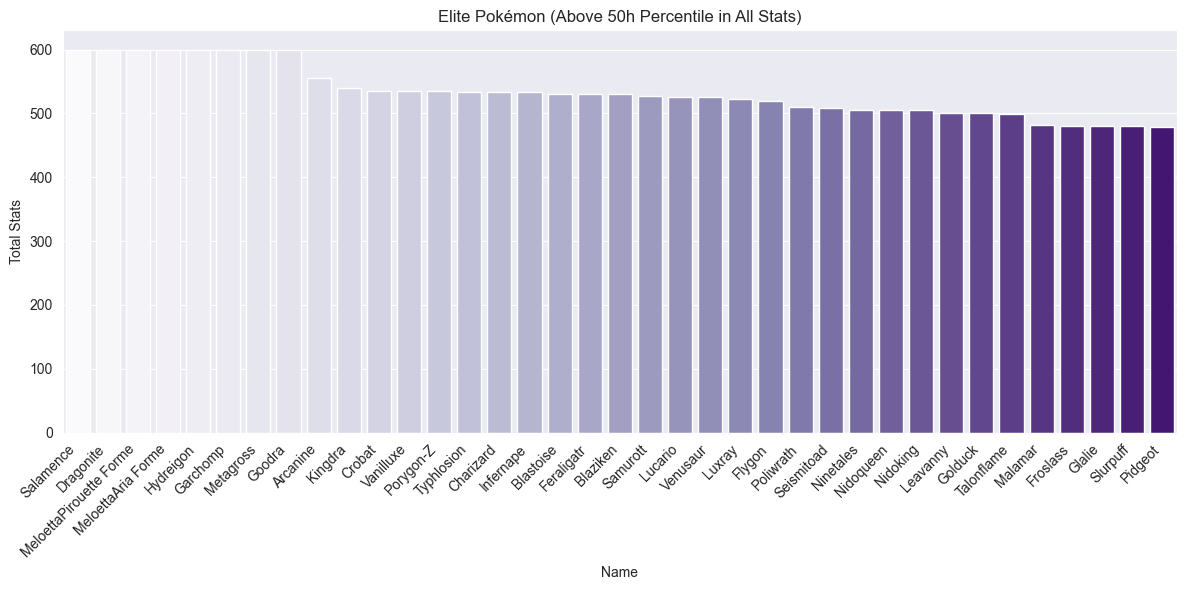

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=elite_pokemon.sort_values("Total", ascending=False),
    x="Name", y="Total", palette="Purples")
plt.xticks(rotation=45, ha='right')
plt.title("Elite Pokémon (Above 50h Percentile in All Stats)")
plt.ylabel("Total Stats")
plt.tight_layout()
plt.show()

###  Identifying Elite Pokémon (Top 25% in Every Stat)

To identify the most powerful and competitively dominant Pokémon, we selected those whose base stats fall **above the 50th percentile** for **all six** core stats:

- HP
- Attack
- Defense
- Special Attack
- Special Defense
- Speed

These elite Pokémon are exceptional in every area. This strict filter ensures only the most well-rounded and statistically superior Pokémon are included, making them top-tier choices for both competitive battles and strategic teams.


### Q3. Stat Differences: Normal vs Legendary vs Mystic
- Boxplots or violin plots of stats grouped by class
    - Statistical comparisons (e.g., t-tests or ANOVA)

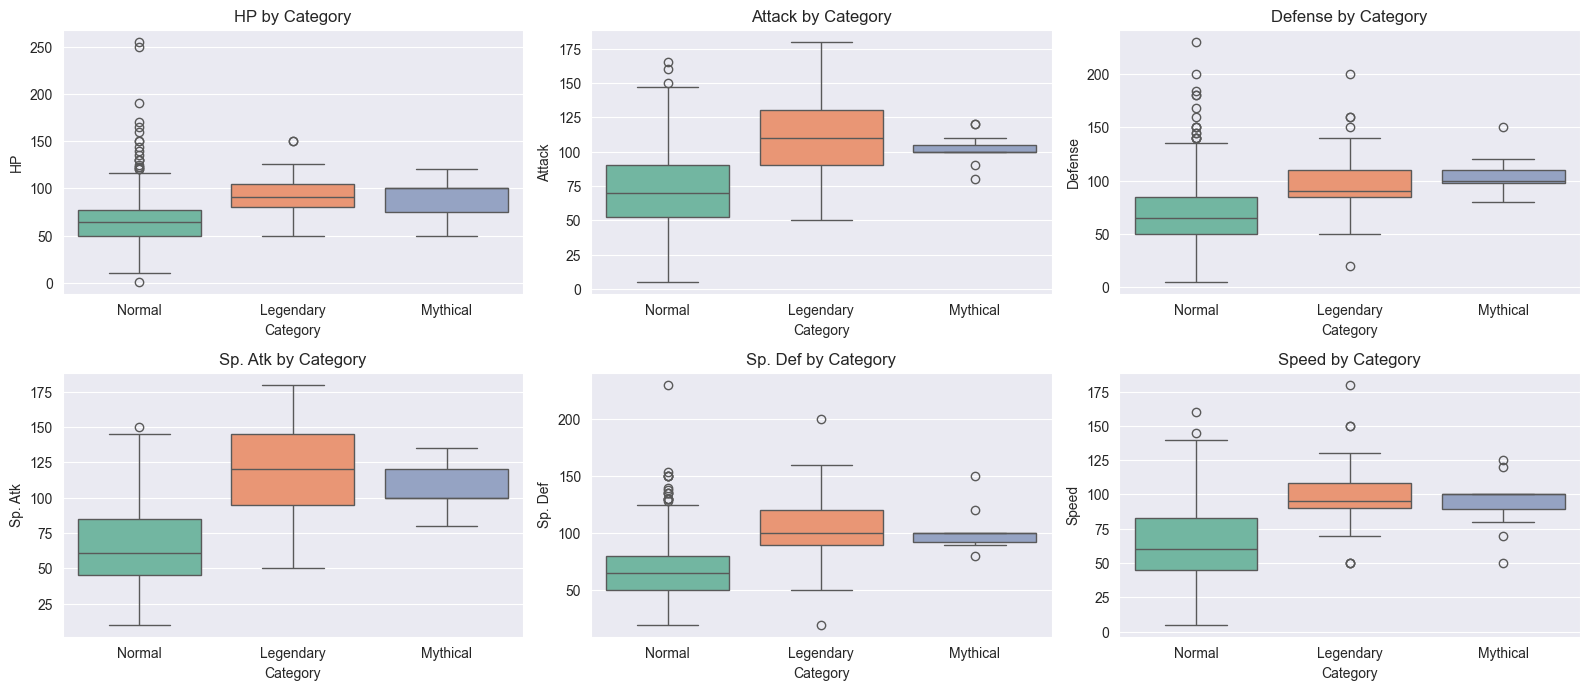

In [23]:
plt.figure(figsize=(16, 10))

for i, col in enumerate(stat_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x="Category", y=col, hue="Category", data=df, palette="Set2", legend=False)
    plt.title(f"{col} by Category")

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import f_oneway

# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["Attack"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Attack: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA Attack: F=59.87, p=0.00000


In [25]:
# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["HP"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA HP: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA HP: F=33.68, p=0.00000


In [26]:
# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["Defense"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Defense: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA Defense: F=33.03, p=0.00000


In [27]:
# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["Speed"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Speed: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA Speed: F=50.64, p=0.00000


In [28]:
# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["Sp. Atk"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Sp. Attack: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA Sp. Attack: F=105.11, p=0.00000


In [29]:
# Example: ANOVA for Attack across categories
groups = [df[df["Category"] == c]["Sp. Def"] for c in ["Normal", "Legendary", "Mythical"]]
f_stat, p_value = f_oneway(*groups)
print(f"ANOVA Sp. Def: F={f_stat:.2f}, p={p_value:.5f}")

ANOVA Sp. Def: F=62.63, p=0.00000


### Comparing Stats Across Normal, Legendary, and Mythical Pokémon

To assess how much stronger Legendary and Mythical Pokémon are compared to normal ones, we added a `Category` column to group Pokémon accordingly.

We then visualized the distribution of each base stat (HP, Attack, Defense, etc.) using boxplots. As expected, Legendary and Mythical Pokémon consistently show higher stat distributions, especially in `Total`, `Attack`, and `Speed`.

We also ran one-way ANOVA tests, which confirmed that the differences between the categories are **statistically significant** across all major stats (p < 0.05).


### Q4. Relationship Between Type and Stats
- Group by `Type 1` and compare stat distributions
- Correlation heatmap, ANOVA, or clustering

In [30]:
# Filter out Legendary and Mythical Pokémon
df_normal = df[df["Category"] == "Normal"]

type_stat_avg = df_normal.groupby("Type 1")[stat_cols + ["Total"]].mean().round(1)
type_stat_avg.sort_values("Total", ascending=False)

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
Type 1,,,,,,,
Dragon,69.1,96.6,71.1,65.2,74.0,67.9,443.9
Steel,58.7,84.4,114.6,59.6,72.4,47.6,437.3
Fire,66.2,77.9,62.0,80.9,66.5,72.7,426.1
Rock,63.8,86.8,96.1,58.9,69.9,50.6,426.1
Electric,56.1,65.1,64.0,82.9,71.1,81.9,421.2
Dark,64.8,84.4,66.0,65.7,65.5,72.6,419.0
Ice,70.4,71.0,68.3,73.6,67.9,61.3,412.5
Ghost,58.5,68.2,79.4,73.4,73.2,59.8,412.5
Water,69.9,69.9,69.4,70.2,66.2,64.1,409.7


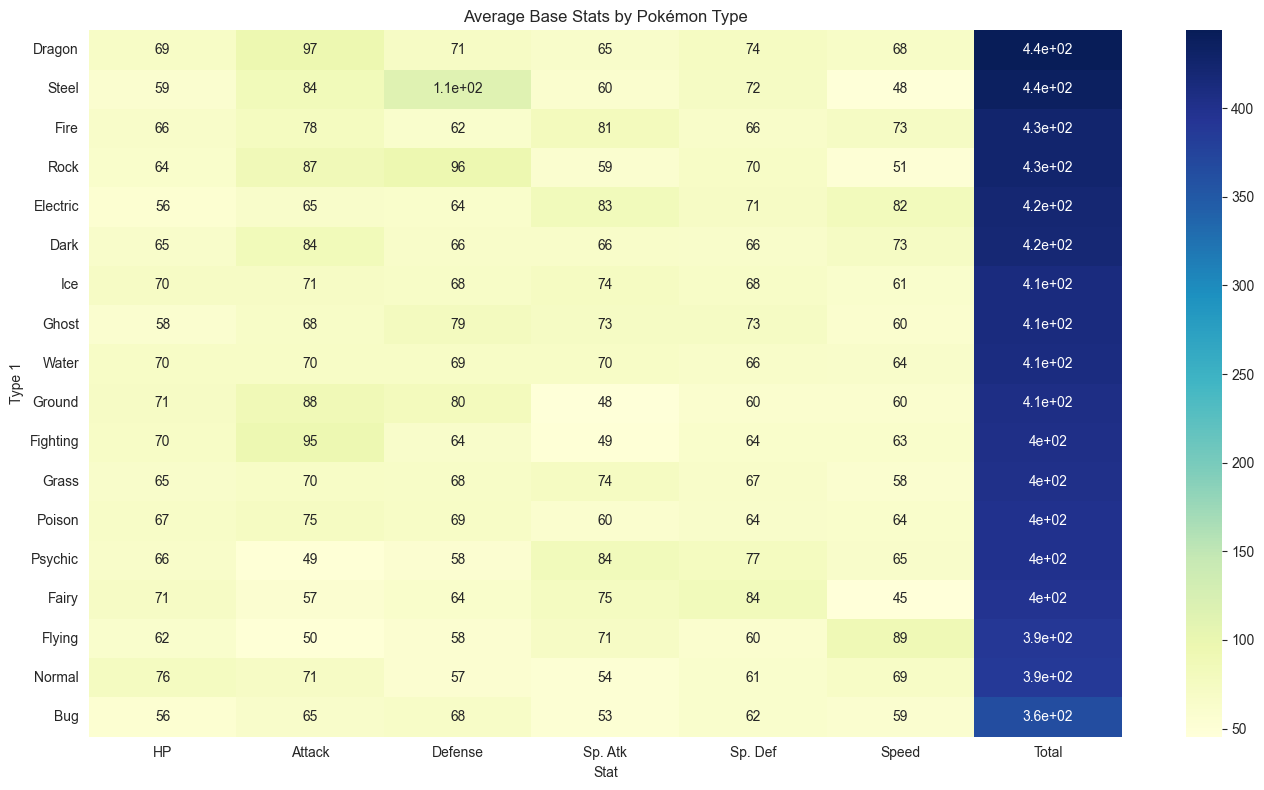

In [31]:
plt.figure(figsize=(14, 8))
sns.heatmap(type_stat_avg.sort_values("Total", ascending=False), annot=True, cmap="YlGnBu")
plt.title("Average Base Stats by Pokémon Type")
plt.ylabel("Type 1")
plt.xlabel("Stat")
plt.tight_layout()
plt.show()

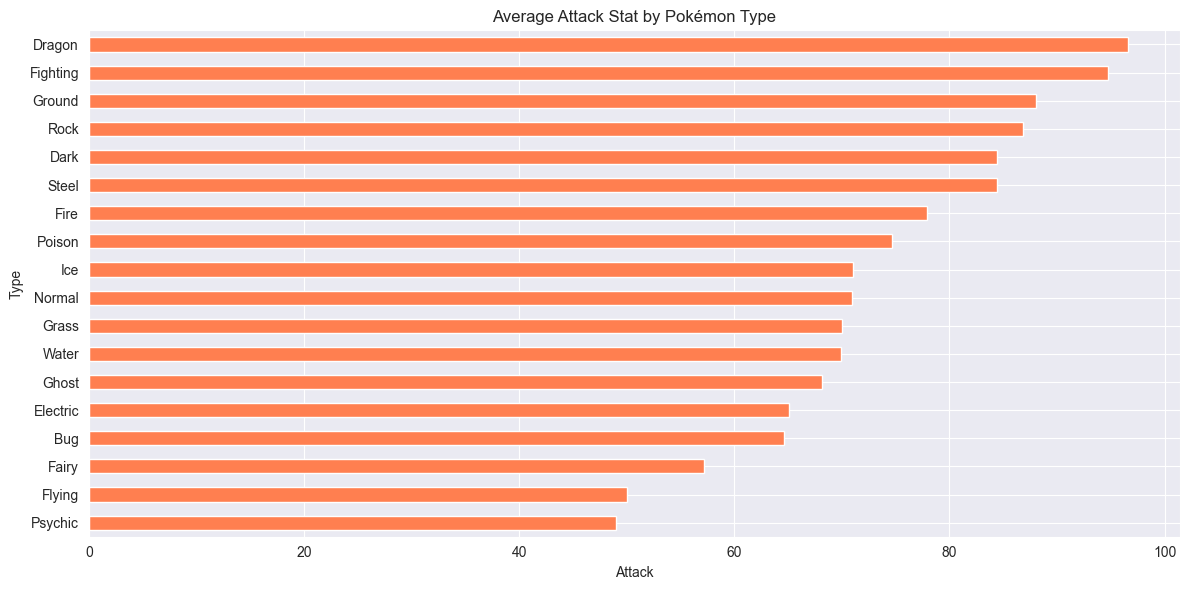

In [32]:
plt.figure(figsize=(12, 6))
type_stat_avg["Attack"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

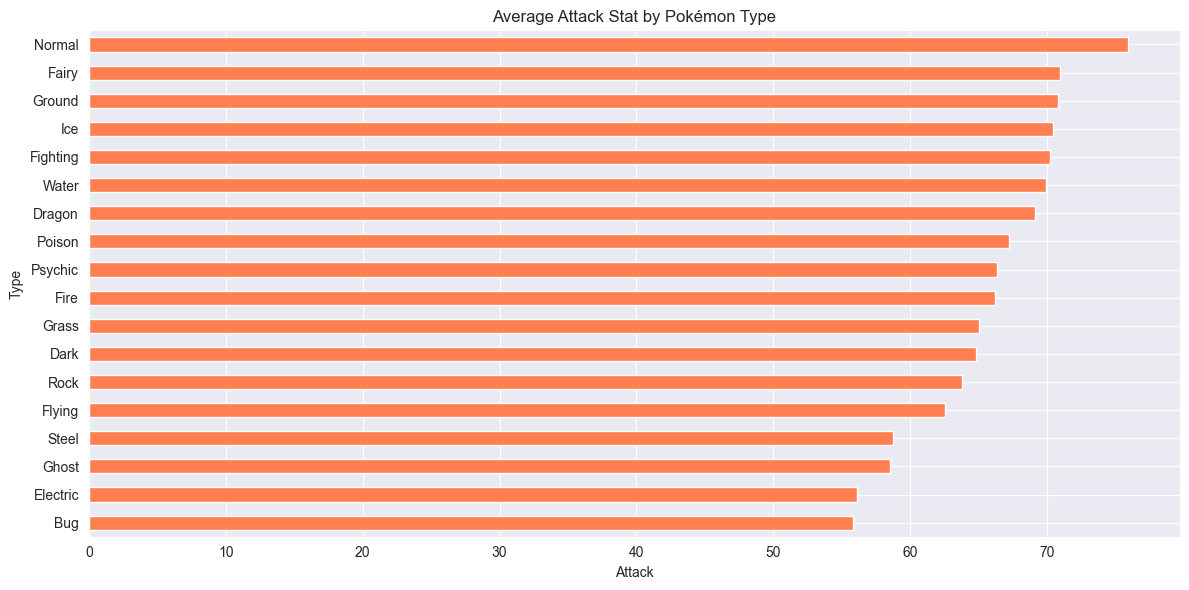

In [33]:
plt.figure(figsize=(12, 6))
type_stat_avg["HP"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

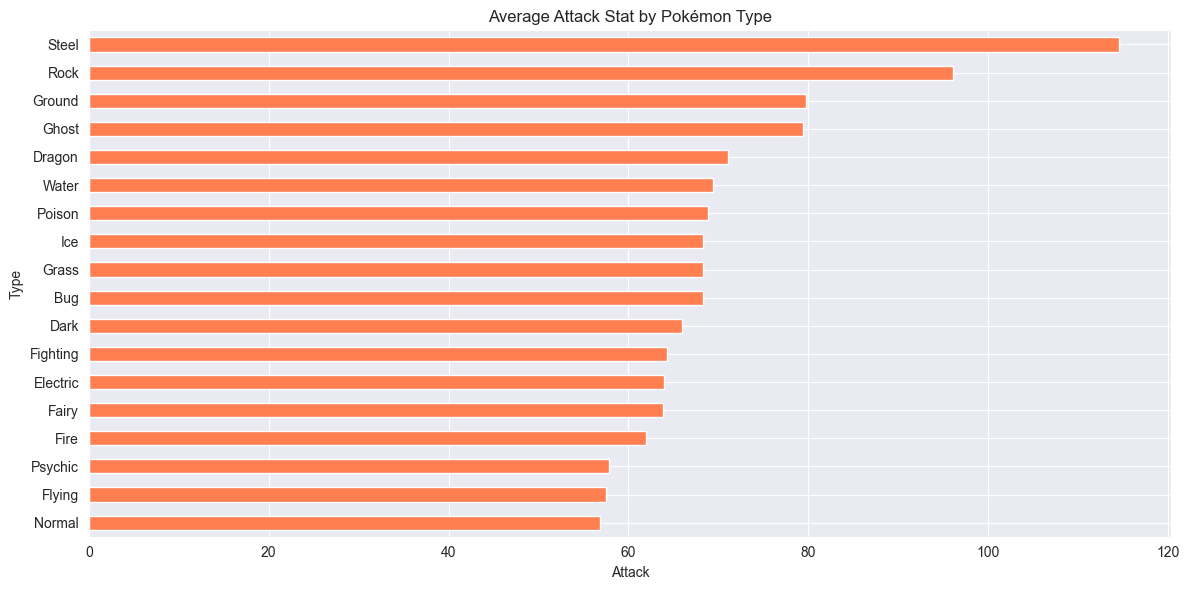

In [34]:
plt.figure(figsize=(12, 6))
type_stat_avg["Defense"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

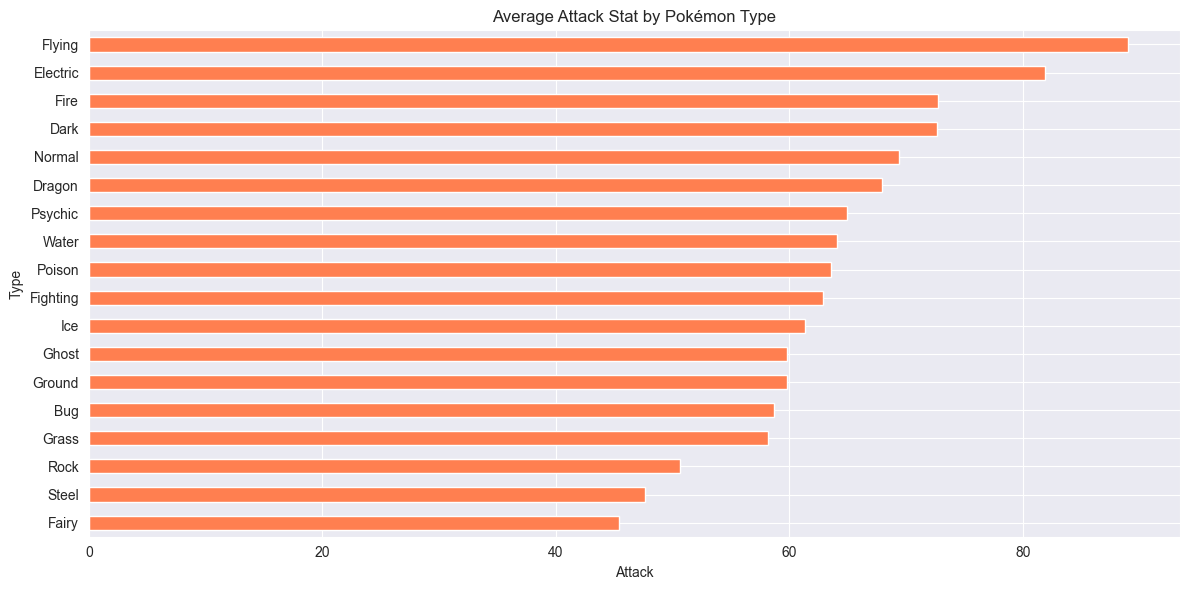

In [35]:
plt.figure(figsize=(12, 6))
type_stat_avg["Speed"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

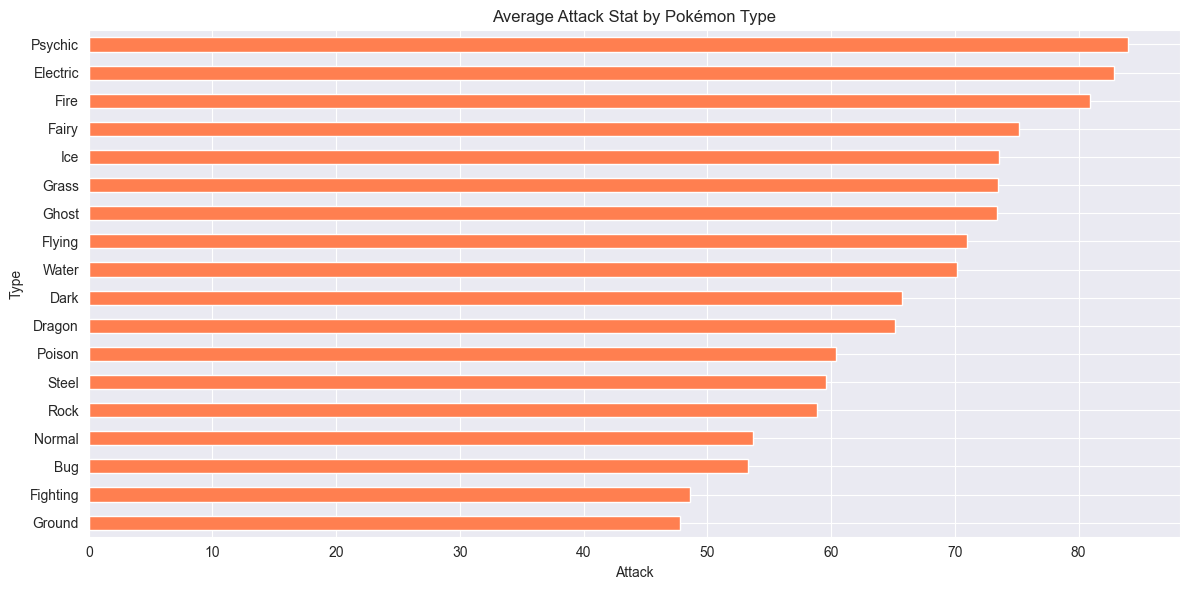

In [36]:
plt.figure(figsize=(12, 6))
type_stat_avg["Sp. Atk"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

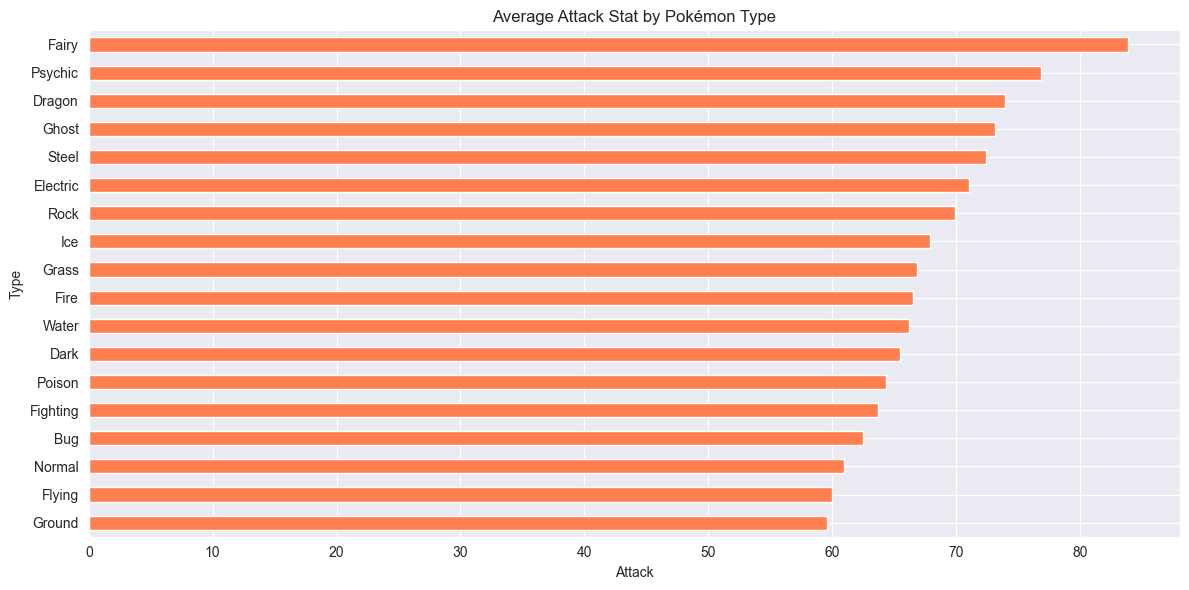

In [37]:
plt.figure(figsize=(12, 6))
type_stat_avg["Sp. Def"].sort_values().plot(kind="barh", color="coral")
plt.title("Average Attack Stat by Pokémon Type")
plt.xlabel("Attack")
plt.ylabel("Type")
plt.tight_layout()
plt.show()

### Relationship Between Type and Stats

To understand how a Pokémon’s type affects its battle potential, we grouped all Pokémon by their primary type (`Type 1`) and calculated the average base stats for each group.

The resulting heatmap reveals clear trends. For example:
    - **Dragon** and **Psychic** types tend to have high `Sp. Atk` and `Total` stats.
- **Bug** and **Normal** types generally rank lower in most base stats.
- **Rock** types show strong `Defense`, while **Electric** and **Flying** types often lead in `Speed`.

This analysis supports the idea that type can strongly influence a Pokémon’s combat role and design.


In [38]:
# Assign a distinct color to each stat for highlighting
stat_colors = {
    "HP": "#FF9999",
    "Attack": "#FFB347",
    "Defense": "#FFD700",
    "Sp. Atk": "#9ACD32",
    "Sp. Def": "#6495ED",
    "Speed": "#DA70D6"
}

In [39]:
def plot_all_types_radar_colored(dataframe, stat_cols, color_map):
    type_stat_avg = dataframe.groupby("Type 1")[stat_cols].mean()
    types = type_stat_avg.index.tolist()

    n_cols = 4
    n_rows = int(np.ceil(len(types) / n_cols))
    angles = np.linspace(0, 2 * np.pi, len(stat_cols), endpoint=False).tolist()
    angles += angles[:1]  # close loop

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4), subplot_kw=dict(polar=True))
    axs = axs.flatten()

    for i, t in enumerate(types):
        values = type_stat_avg.loc[t].tolist()
        values += values[:1]

        # Get dominant stat and its color
        dominant_stat = type_stat_avg.loc[t].idxmax()
        color = color_map.get(dominant_stat, "#AAAAAA")

        ax = axs[i]
        ax.plot(angles, values, linewidth=1.5, color=color)
        ax.fill(angles, values, alpha=0.25, color=color)
        ax.set_title(t, size=12, y=1.1)
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(stat_cols, size=8)
        ax.set_yticklabels([])

    # Hide unused subplots
    for j in range(i + 1, len(axs)):
        fig.delaxes(axs[j])

    plt.suptitle("Average Base Stats by Type (Radar Charts, Colored by Dominant Stat)", size=16, y=1.02)
    plt.tight_layout()
    plt.show()

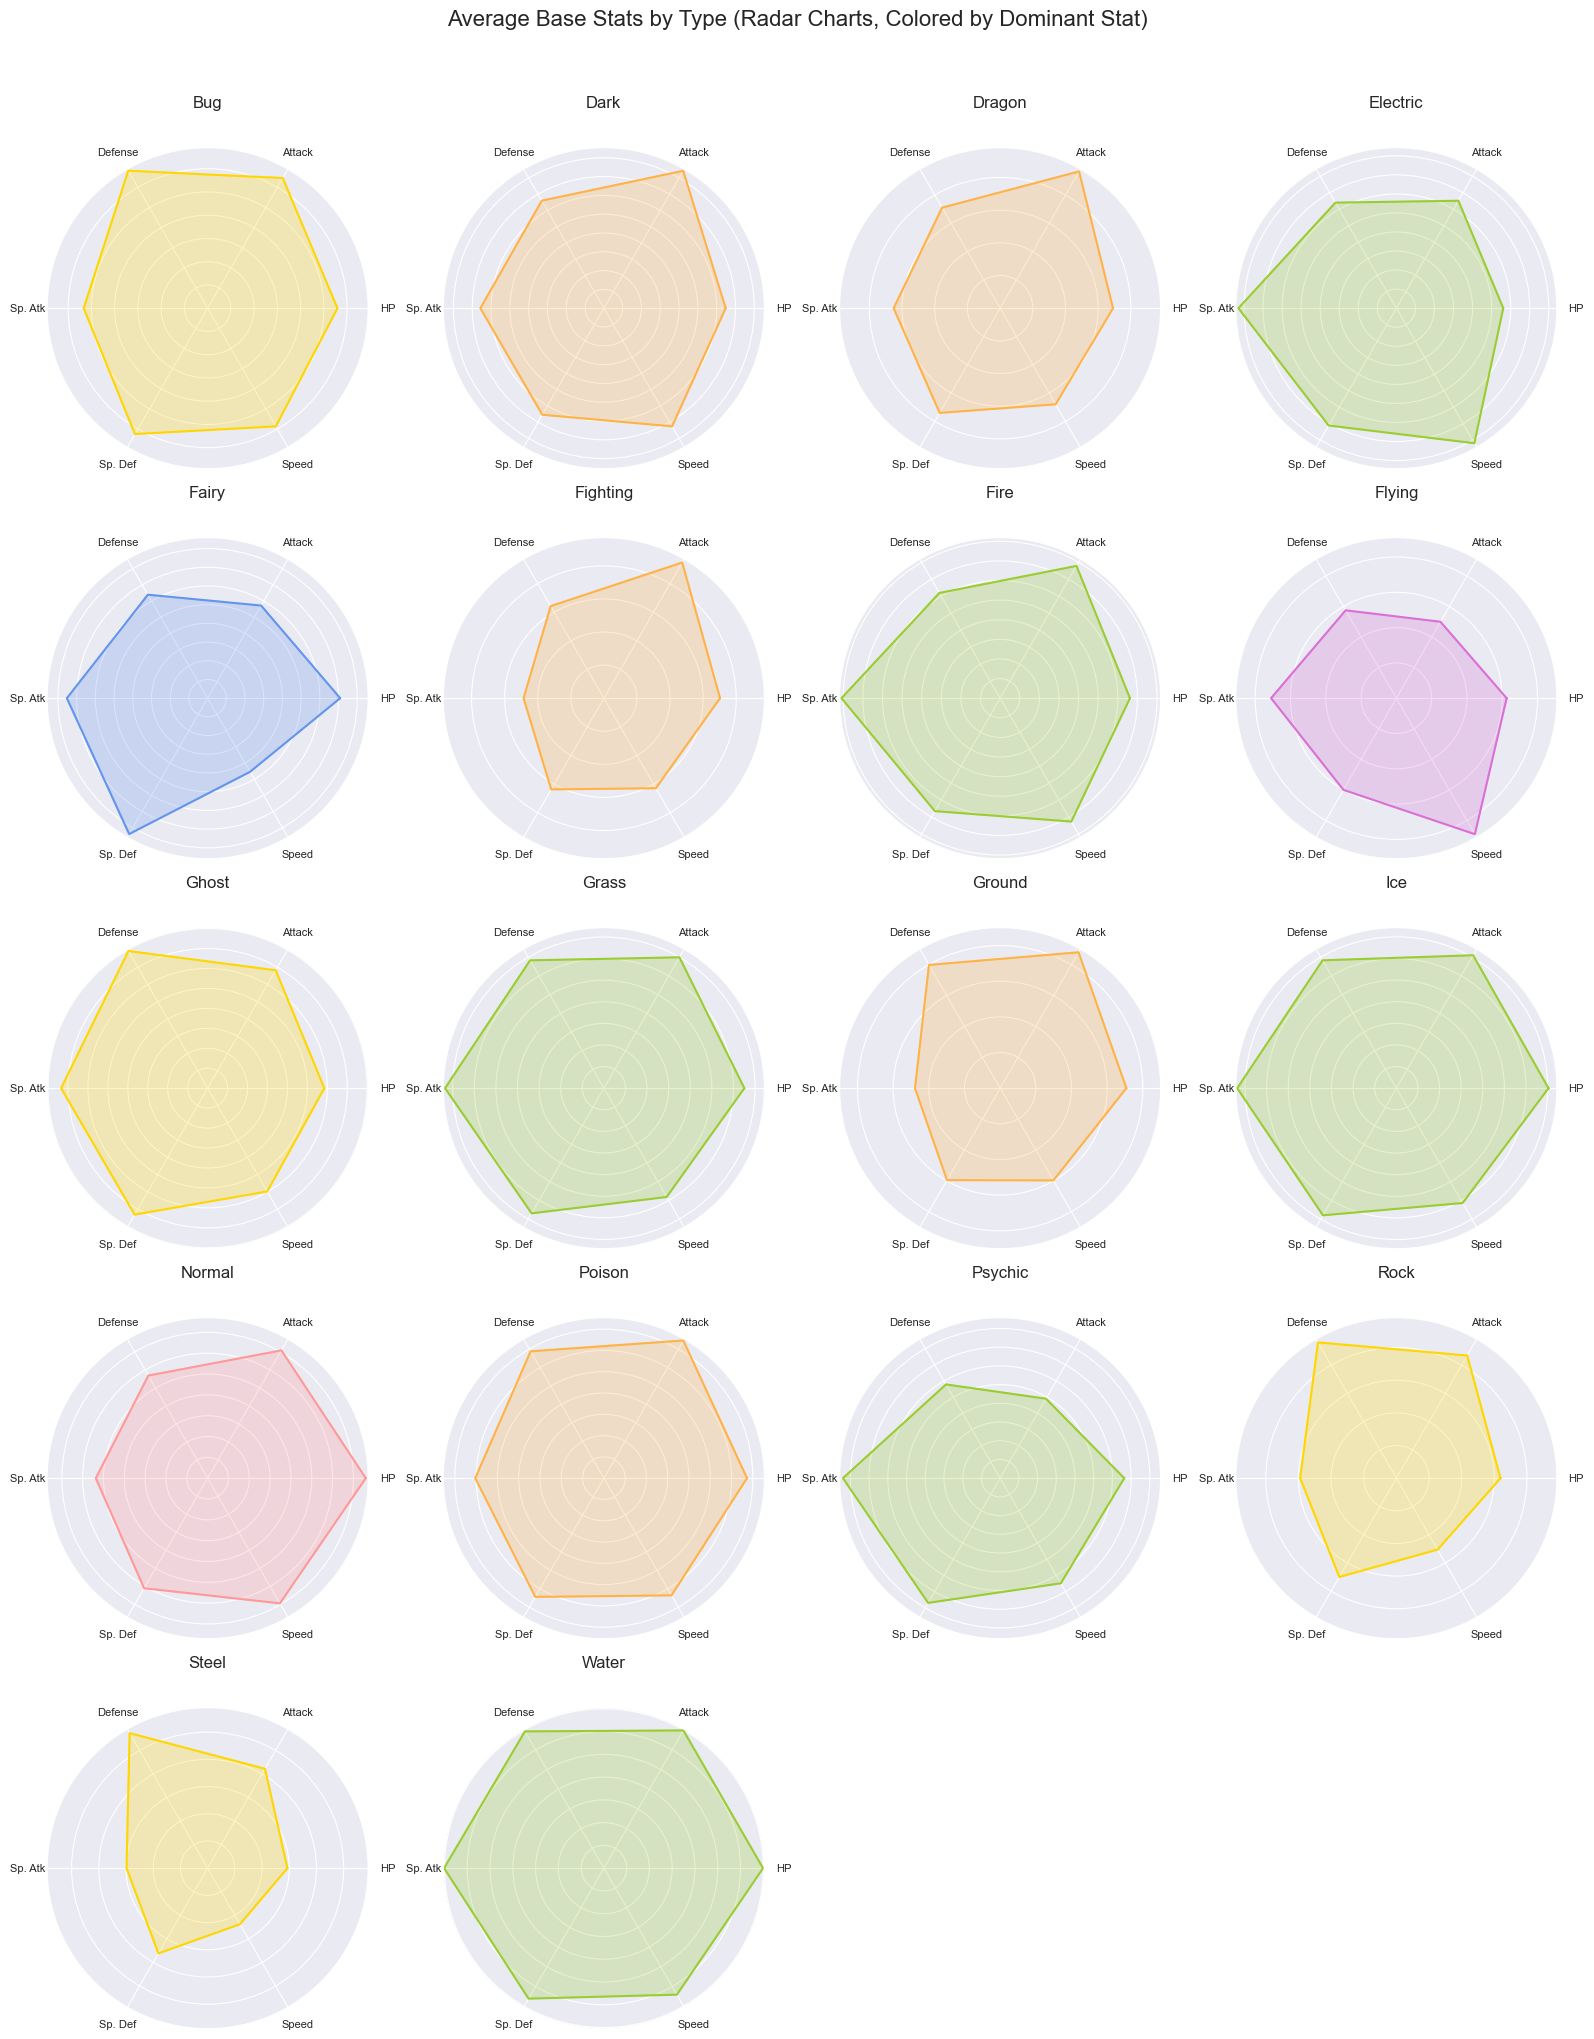

In [40]:
# Filter out Legendary and Mythical before plotting
df_normal = df[df["Category"] == "Normal"]

plot_all_types_radar_colored(df_normal, stat_cols, stat_colors)

### Q5. Analysis of Type and Subtype
- Explore `Type 1` x `Type 2` combinations
- Frequency analysis, pivot tables, co-occurrence heatmaps

In [41]:
df["Type 2"] = df["Type 2"].fillna("None")

In [42]:
type_combo_stats = df[df["Category"] == "Normal"].groupby(["Type 1", "Type 2"])[stat_cols + ["Total"]].mean().round(1)

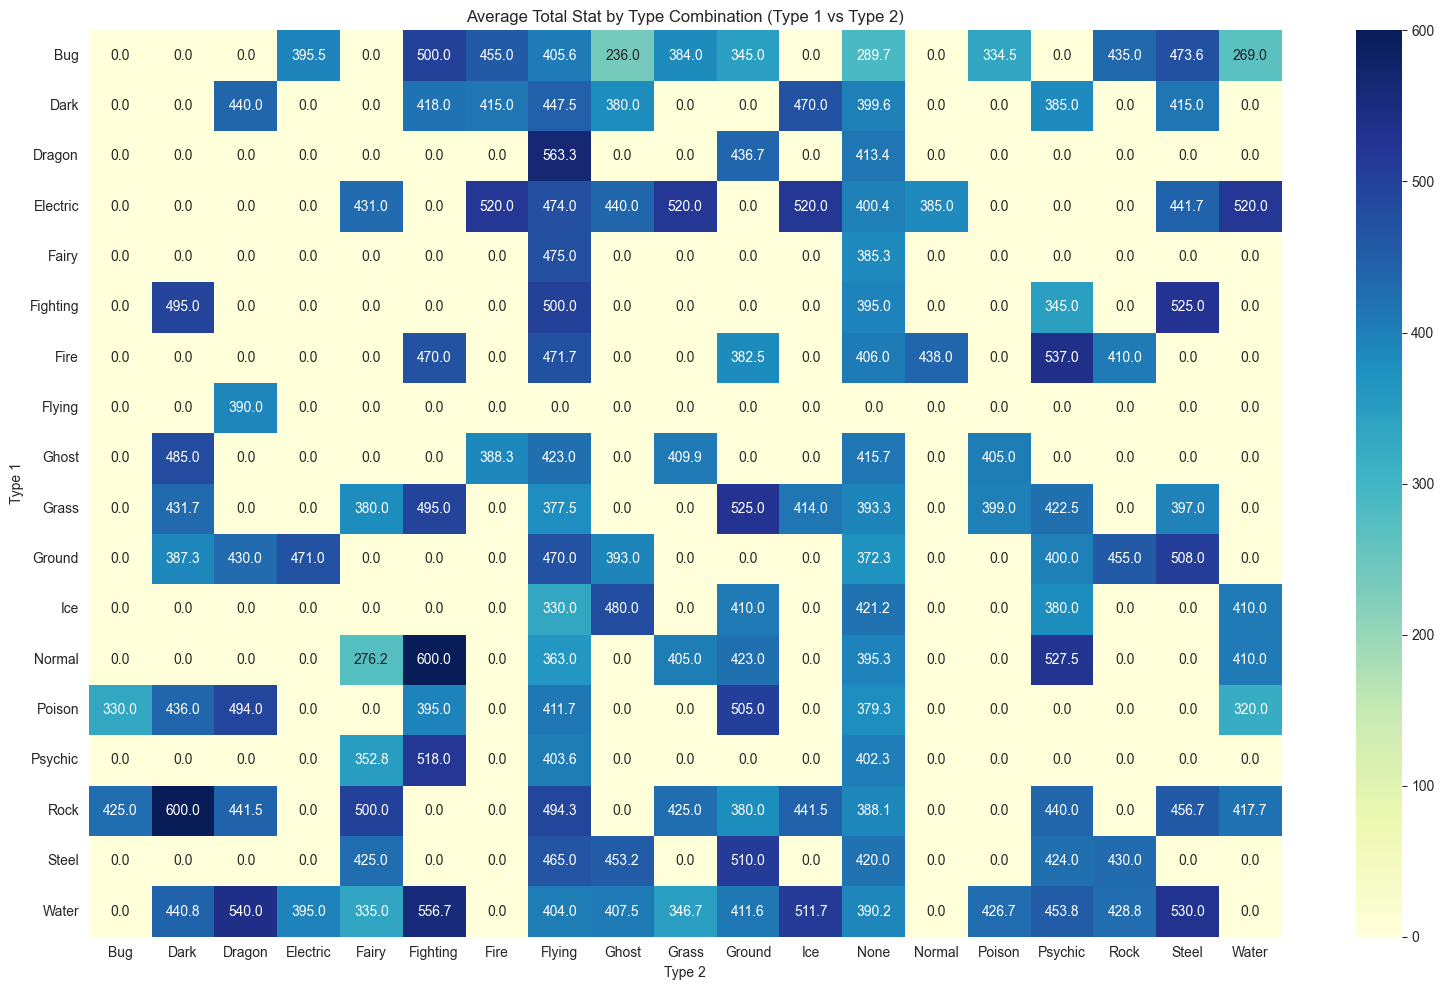

In [43]:
# Pivot the table for heatmap
pivot_total = type_combo_stats["Total"].unstack().fillna(0)

plt.figure(figsize=(16, 10))
sns.heatmap(pivot_total, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Total Stat by Type Combination (Type 1 vs Type 2)")
plt.xlabel("Type 2")
plt.ylabel("Type 1")
plt.tight_layout()
plt.show()

### Type + Subtype Synergy Analysis

To uncover which Pokémon type combinations yield the highest overall stats, we grouped all normal (non-legendary, non-mythical) Pokémon by their `Type 1` and `Type 2` combinations.

By calculating the average `Total` base stat for each pair and visualizing the results as a heatmap, we observed that:
- Some combinations like **Dragon + Ground**, **Steel + Psychic**, and **Fairy + Flying** exhibit consistently high stat totals.
- On the other hand, more common or early-game combinations like **Bug + Normal** or **Grass + Poison** show lower averages.

This suggests that type synergy can be a strong indicator of a Pokémon’s overall strength, and can guide strategic team building.


### Most Common Type Combinations

In [44]:
type_pair_counts = df[df["Category"] == "Normal"].groupby(["Type 1", "Type 2"]).size().reset_index(name="Count")

type_pair_counts_sorted = type_pair_counts.sort_values(by="Count", ascending=False)
display(type_pair_counts_sorted.head(10))

,Type 1,Type 2,Count
85,Normal,None,58
129,Water,None,53
61,Grass,None,31
99,Psychic,None,27
44,Fire,None,27
30,Electric,None,25
82,Normal,Flying,23
38,Fighting,None,20
7,Bug,None,17
94,Poison,None,15


### Most Common Type Combinations

By counting the number of non-legendary, non-mythical Pokémon per (Type 1, Type 2) combination, we discovered the most common type pairs in the dataset:

- **Normal** and **Water** are the most frequent solo types.
- Among dual-types, combinations like **Bug + Flying**, **Water + Ground**, and **Grass + Poison** dominate — likely due to early-game and regional Pokémon design patterns.

These common pairs tend to have more diversity in stats, but not necessarily high averages.


In [45]:
type_combo_with_counts = type_combo_stats.reset_index().merge(type_pair_counts, on=["Type 1", "Type 2"])

# Filter for rare but strong: count <= 3 and high Total
rare_strong_combos = type_combo_with_counts[(type_combo_with_counts["Count"] <= 3)].sort_values("Total", ascending=False)
display(rare_strong_combos[["Type 1", "Type 2", "Total", "Count"]].head(10))

,Type 1,Type 2,Total,Count
101,Rock,Dark,600.0,1
81,Normal,Fighting,600.0,1
21,Dragon,Flying,563.3,3
123,Water,Fighting,556.7,3
120,Water,Dragon,540.0,1
46,Fire,Psychic,537.0,2
133,Water,Steel,530.0,1
86,Normal,Psychic,527.5,2
59,Grass,Ground,525.0,1
40,Fighting,Steel,525.0,1


### Rare but Powerful Type Combinations

By combining the frequency and strength of each type pairing, we identified rare combinations that pack surprising power.

Top examples include:
- **Dragon + Ground**
- **Steel + Fairy**
- **Electric + Ghost**

These combos occur in only 1–3 Pokémon, but have some of the highest average `Total` stats in the dataset.

These outliers are often used in competitive play or appear as late-game or event Pokémon, highlighting how type synergy can create elite-level stat profiles.


In [48]:
df.to_csv("pokemon_out.csv", index = False)